In [9]:
import numpy as np
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin

from sklearn.model_selection import BaseCrossValidator

from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.utils.validation import check_array
from sklearn.utils.multiclass import check_classification_targets
from sklearn.metrics.pairwise import pairwise_distances

In [32]:
from sklearn.datasets import make_blobs



X, y = make_blobs(n_samples=20, n_features=2, random_state=0,  )

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [35]:
X_train, y_train

(array([[-1.87481616,  3.07423123],
        [-3.2331742 ,  4.86865766],
        [ 2.10102604,  0.71047981],
        [ 4.32502215, -0.55670201],
        [ 1.28933778,  3.44969159],
        [-2.57545698,  1.49786432],
        [ 1.7373078 ,  4.42546234],
        [ 1.9263585 ,  4.15243012],
        [ 1.16748177, -1.08313281],
        [-0.29661333,  4.12026211],
        [ 2.47034915,  4.09862906],
        [ 2.21021495,  1.27582618],
        [ 1.12031365,  5.75806083],
        [-2.03655619,  2.47980796],
        [-0.49772229,  1.55128226]]),
 array([2, 2, 1, 1, 0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 1]))

In [28]:
X_test

array([[ 2.36833522,  0.04356792],
       [ 2.49913075,  1.23133799],
       [-0.66246781,  2.17571724]])

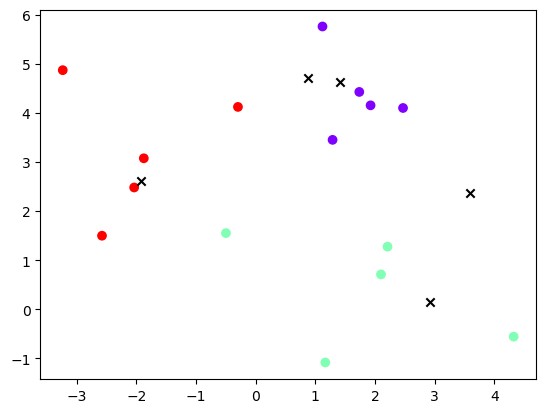

In [42]:
## plot the training set
import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow')
# croix noir pour les points de test

plt.scatter(X_test[:, 0], X_test[:, 1], c='k', marker='x')